### Softmax function

In [1]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # subtracting the max value prevents overflow
    return exp_a / np.sum(exp_a)



### with example

In [2]:
a = np.array([900, 1000]) #input to use for softmax function
s = softmax(a)
print(s)

[3.72007598e-44 1.00000000e+00]


### Softmax without overflowing issue

In [3]:
import numpy as np

def softmax(x):
    """
    Compute the softmax of vector x in a numerically stable way.
    
    Parameters:
    x (ndarray): Input array, can be a 1D or 2D array.
    
    Returns:
    ndarray: Softmax output.
    """
    # Subtract the max value for numerical stability
    c = np.max(x, axis=-1, keepdims=True)  # Find max value for each row
    exp_x = np.exp(x - c)  # Subtract max value from each element before exp
    sum_exp_x = np.sum(exp_x, axis=-1, keepdims=True)  # Sum of exponentials
    return exp_x / sum_exp_x  # Normalize by the sum





### with example

In [4]:
a = np.array([1000.0, 1001.0, 999.0])  # Example input to check
softmax_output = softmax(a)

print("Input:", a)
print("Softmax output:", softmax_output)

Input: [1000. 1001.  999.]
Softmax output: [0.24472847 0.66524096 0.09003057]


In [5]:
import urllib
import gzip
import numpy as np
import pickle
import os

In [15]:
image_size = 28*28
dataset_dir = 'dataset'
dataset_pkl = 'mnist.pkl'
url_base = 'http://jrkwon.com/data/ece5831/mnist/' 

### _download and _download_all

In [36]:
import os
import urllib.request

# Base URL for the MNIST dataset
url_base = 'http://jrkwon.com/data/ece5831/mnist/'

# Create the directory if it doesn't exist
dataset_dir = 'dataset'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Dictionary with filenames for MNIST dataset
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images':  't10k-images-idx3-ubyte.gz',
    'test_labels':  't10k-labels-idx1-ubyte.gz'
}
# Download each file
for key, file_name in key_file.items():
    file_path = url_base + file_name
    print(f"Downloading {file_name}...")
    
    # Download the file and save it in the dataset directory
    urllib.request.urlretrieve(file_path, os.path.join(dataset_dir, file_name))

print("All files downloaded successfully!")



All files downloaded successfully!


### _load_images, _load_labels

In [38]:
import gzip
import numpy as np

image_size = 28 * 28

def _load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, image_size)
    return images

def _load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

# Example test
test_images = _load_images(os.path.join(dataset_dir, key_file['test_images']))
test_labels = _load_labels(os.path.join(dataset_dir, key_file['test_labels']))
print(f"Test Images Shape: {test_images.shape}")
print(f"Test Labels Shape: {test_labels.shape}")


Test Images Shape: (10000, 784)
Test Labels Shape: (10000,)


### Show the loaded images and labels are proper by displaying at least one image and label.

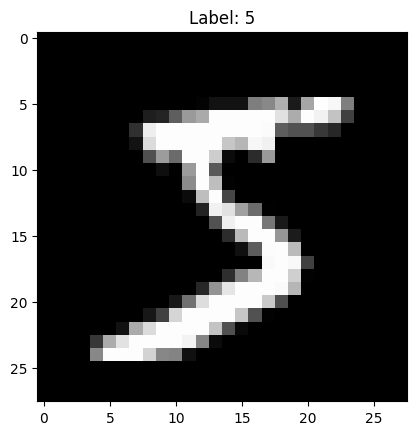

In [39]:
# Function to load the dataset and display an image and its corresponding label
import matplotlib.pyplot as plt

# Load the dataset from the pickle file
with open(f'{dataset_dir}/mnist.pkl', 'rb') as f:
    dataset = pickle.load(f)

# Get the first image and label from the train dataset
first_image = dataset['train_images'][0]
first_label = dataset['train_labels'][0]

# Display the image
plt.imshow(first_image.reshape(28, 28), cmap='gray')
plt.title(f"Label: {first_label}")
plt.show()


### Creating dataset

In [40]:
import pickle

def _create_dataset():
    dataset = {}
    dataset['train_images'] = _load_images(os.path.join(dataset_dir, key_file['train_images']))
    dataset['train_labels'] = _load_labels(os.path.join(dataset_dir, key_file['train_labels']))
    dataset['test_images'] = _load_images(os.path.join(dataset_dir, key_file['test_images']))
    dataset['test_labels'] = _load_labels(os.path.join(dataset_dir, key_file['test_labels']))
    
    with open(f'{dataset_dir}/mnist.pkl', 'wb') as f:
        print(f'Creating Pickle: {dataset_dir}/mnist.pkl')
        pickle.dump(dataset, f)
        print('Done')

# Example
_create_dataset()


Creating Pickle: dataset/mnist.pkl
Done


### _change_one_hot_label()

In [41]:
def _change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    return t




### example of one_hot_encoded result

In [42]:

labels = np.array([1, 0, 9, 8])
one_hot_labels = _change_one_hot_label(labels, 10)
print(one_hot_labels)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### MnistData class with inclusion of __init__dataset()

In [43]:
class MnistData:
    """
    A class to handle the MNIST dataset, including downloading, loading, and processing the data.
    
    Attributes:
    -----------
    image_dim : tuple
        Dimensions of each image in the MNIST dataset (28x28 pixels).
    image_size : int
        Total number of pixels per image (28 * 28).
    dataset_dir : str
        Directory where the dataset files will be stored.
    dataset_pkl : str
        Filename for the serialized dataset in pickle format.
    url_base : str
        Base URL for downloading the MNIST dataset.
    key_file : dict
        Dictionary mapping dataset types (train/test images and labels) to their respective filenames.
    dataset : dict
        Stores the MNIST data, including images and labels for training and testing.
    dataset_pkl_path : str
        The full path to the pickle file where the dataset is stored.
    """
    image_dim = (28, 28)
    image_size = image_dim[0] * image_dim[1]
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images': 't10k-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        """
        Initializes the MnistData object. Sets up the dataset directory, initializes the dataset,
        and ensures that the necessary files are downloaded and loaded into memory.
        """
        self.dataset = {}
        self.dataset_pkl_path = os.path.join(self.dataset_dir, self.dataset_pkl)
        if not os.path.exists(self.dataset_dir):
            os.mkdir(self.dataset_dir)
        self._init_dataset()

    def _download(self, file_name):
        """
        Downloads a MNIST dataset file if it does not already exist in the dataset directory.
        
        Parameters:
        -----------
        file_name : str
            The name of the file to download.
        """
        file_path = os.path.join(self.dataset_dir, file_name)
        if os.path.exists(file_path):
            print(f"File: {file_name} already exists.")
            return
        print(f"Downloading {file_name}...")
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)
        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print("Done")

    def _download_all(self):
        """
        Downloads all required MNIST dataset files (train/test images and labels).
        """
        for file_name in self.key_file.values():
            self._download(file_name)

    def _load_images(self, file_name):
        """
        Loads and processes MNIST images from a gzipped file.
        
        Parameters:
        -----------
        file_name : str
            The name of the file containing the image data.
            
        Returns:
        --------
        np.ndarray
            A NumPy array containing the reshaped image data.
        """
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        return images.reshape(-1, self.image_size)

    def _load_labels(self, file_name):
        """
        Loads MNIST labels 
        Parameters:
        -----------
        file_name : str
            The name of the file containing the label data.
            
        Returns:
        --------
        np.ndarray
            A NumPy array containing the label data.
        """
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def _create_dataset(self):
        """
        Loads the MNIST dataset (both images and labels for training and testing) and saves it as a pickle file.
        """
        self.dataset['train_images'] = self._load_images(os.path.join(self.dataset_dir, self.key_file['train_images']))
        self.dataset['train_labels'] = self._load_labels(os.path.join(self.dataset_dir, self.key_file['train_labels']))
        self.dataset['test_images'] = self._load_images(os.path.join(self.dataset_dir, self.key_file['test_images']))
        self.dataset['test_labels'] = self._load_labels(os.path.join(self.dataset_dir, self.key_file['test_labels']))
        with open(self.dataset_pkl_path, 'wb') as f:
            print(f'Creating Pickle: {self.dataset_pkl_path}')
            pickle.dump(self.dataset, f)
            print('Done')

    def _init_dataset(self):
        """
        Initializes the dataset by downloading the required files, creating the dataset if needed, and loading
        it from a pickle file if it exists.
        """
        self._download_all()
        if os.path.exists(self.dataset_pkl_path):
            with open(self.dataset_pkl_path, 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading...')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()

    def load(self):
        """
        Normalizes the image data (converting pixel values to the range [0, 1]) and converts the labels to one-hot
        encoding.
        
        Returns:
        --------
        tuple:
            Two tuples containing training data (images, labels) and test data (images, labels).
        """
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32) / 255.0
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)
        return (self.dataset['train_images'], self.dataset['train_labels']), \
               (self.dataset['test_images'], self.dataset['test_labels'])

    def _change_one_hot_label(self, y, num_class):
        """
        Converts a label vector into a one-hot encoded matrix.
        
        Parameters:
        -----------
        y : np.ndarray
            A 1D array containing class labels.
        num_class : int
            The number of classes (e.g., 10 for MNIST).
            
        Returns:
        --------
        np.ndarray
            A 2D array where each row is the one-hot encoded representation of the corresponding label.
        """
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t


File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


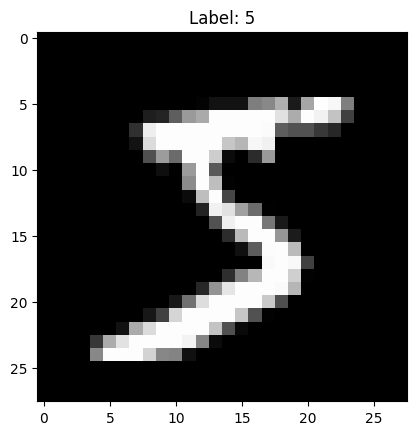

In [44]:
import matplotlib.pyplot as plt

# Instantiate the MnistData class and load the data
mnist_data = MnistData()
(train_images, train_labels), (test_images, test_labels) = mnist_data.load()

# Displaying one of the training images and its label
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(train_labels[0])}")
plt.show()


In [45]:
# Example: One-hot encode a label and display the result
label_example = np.array([3])  # Example label
one_hot_label = mnist_data._change_one_hot_label(label_example, 10)
print("One-hot encoded label for 3:", one_hot_label)


One-hot encoded label for 3: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Label (one-hot): [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Label: 8


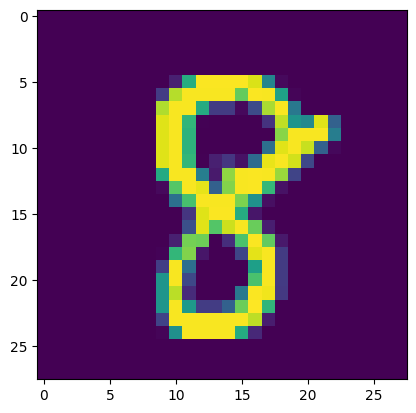

In [46]:
idx = np.random.randint(test_images.shape[0], size=1)
print(f'Label (one-hot): {test_labels[idx]}')
print(f'Label: {np.argmax(test_labels[idx])}')
plt.imshow(test_images[idx].reshape(28,28))

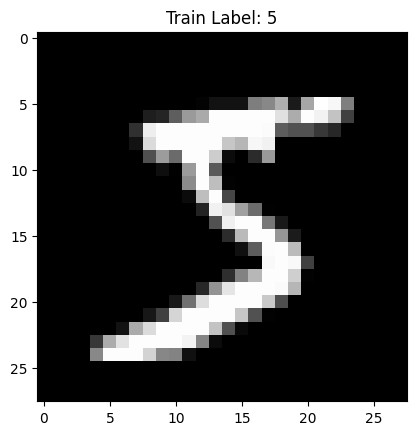

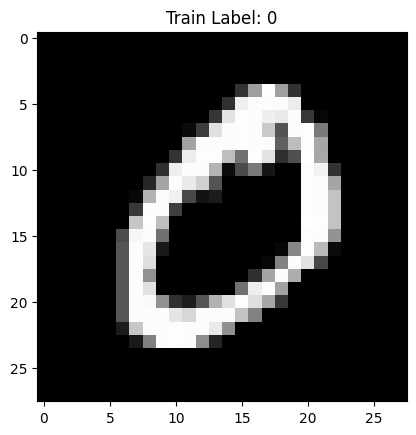

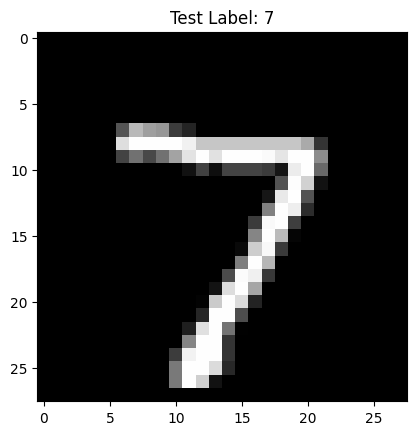

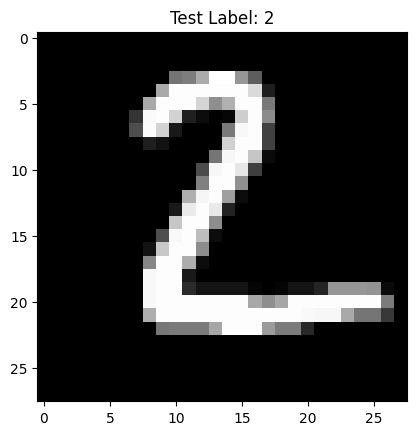

In [47]:
# Display two examples from the training set
for i in range(2):
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Train Label: {np.argmax(train_labels[i])}")
    plt.show()

# Display two examples from the test set
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Test Label: {np.argmax(test_labels[i])}")
    plt.show()
